# High Resolution Matrix Export

In some cases, we need to export part of selected high resolution area in expression matrix while we read them in low resolution.

Please download our [example data](http://116.6.21.110:8090/share/3ca60300-e8bd-4d67-8b68-14267e428523).

Here we task GEF file as example, you can change `st.io.read_gef` to `st.io.read_gem` to manipulate GEM file.

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import stereo as st

# read GEF file in CGEF
# data_path = '../data/SS200000135TL_D1.cellbin.gef'
# data = st.io.read_gef(data_path, bin_type='cell_bins')

# read GEF file in BGEF
data_path = '../data/SS200000135TL_D1.tissue.gef'
data = st.io.read_gef(data_path, bin_type='bins', bin_size=20)

data.tl.cal_qc()

[2024-04-03 10:22:03][Stereo][251729][MainThread][140209575724864][reader][1090][INFO]: read_gef begin ...


path:../data/SS200000135TL_D1.tissue.gef bin:20
               generateBinInfo - 30.440000 cpu sec


[2024-04-03 10:22:28][Stereo][251729][MainThread][140209575724864][reader][1268][INFO]: the matrix has 223053 cells, and 24302 genes.
[2024-04-03 10:22:28][Stereo][251729][MainThread][140209575724864][reader][1269][INFO]: read_gef end.
[2024-04-03 10:22:28][Stereo][251729][MainThread][140209575724864][st_pipeline][41][INFO]: start to run cal_qc...
[2024-04-03 10:22:29][Stereo][251729][MainThread][140209575724864][st_pipeline][44][INFO]: cal_qc end, consume time 1.2868s.


**We have two selection mode, one is polygon selection and another one is box selection.**

An example of polygon selection:

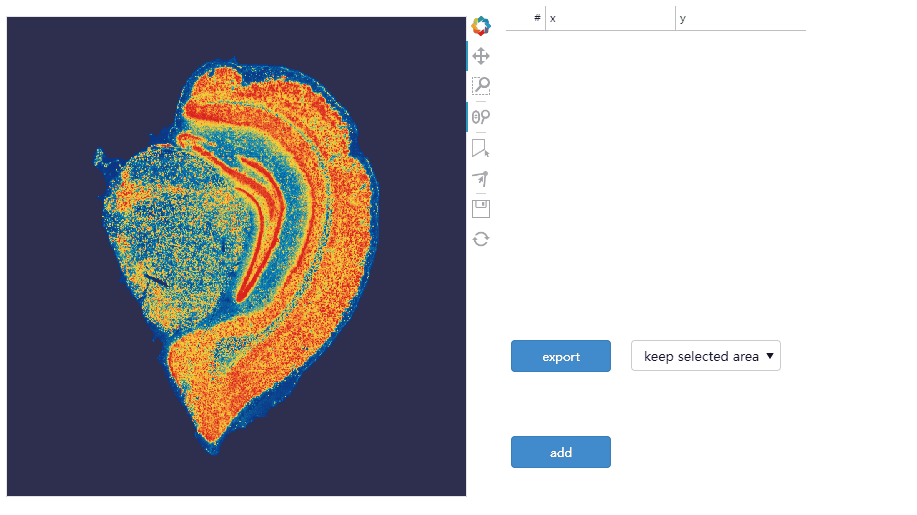

An example of box selection:

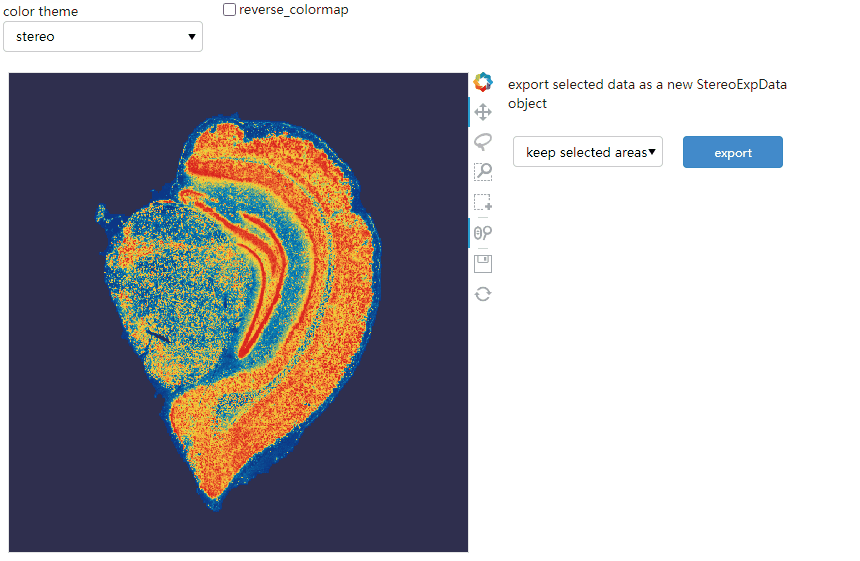

## Area Selection

Setting `ploy_select` to True to enter the polygon selection mode while setting to False to box selection mode.

In polygon selection mode, you need to click twice to start and end the selection, afterwards, for each selected area, you have to click it and click the **add** button so that all the selected areas are added into the queue to be exported.

In box selection mode, you only need to click the **export** button once after completing all selection, all the selected areas will be added into the queue.

In [2]:
# plot and show rendering
# polygon selection when poly_select is True
# box selection when poly_select is False

ins = data.plt.interact_spatial_scatter(width=500, height=500, poly_select=True)
ins.show()

Row
    [0] HoloViews(DynamicMap, height=500, sizing_mode='fixed', width=500)
    [1] Column
        [0] HoloViews(Table, height=300, width=300)
        [1] Markdown(str)
        [2] Row
            [0] Button(button_type='primary', name='export', width=100)
            [1] Select(options={'keep selected area': Fal...}, value=False, width=150)
        [3] StaticText(height=20, sizing_mode='fixed', width=300)
        [4] Markdown(str)
        [5] Button(button_type='primary', name='add', width=100)
        [6] StaticText(height=20, sizing_mode='fixed', width=300)

## Exporting as a GEF/GEM file.

The type of output file is determined by input file, that is say, when input file is GEM, it will still export data as GEM despite you set the extension of output file as `.gef`.

In [4]:
ins.export_high_res_area(
    data_path, 
    './SS200000135TL_D1.tissue.high_res.gef',
    # drop=True
)

processing selected 3 area
minx:0 miny:0 maxx:26458 maxy:26458


'./SS200000135TL_D1.tissue.high_res.gef'

create bgef file: ./SS200000135TL_D1.tissue.high_res.gef
bin 1 matrix: min_x=0 len_x=26459 min_y=0 len_y=26459 matrix_len=700078681
createRegionGef - elapsed time: 20739.21585 ms


## Exporting a sub-image

We can also exporting the sub-image corresponding to the selected areas.

In [5]:
ins.export_roi_image(
    origin_file_path='../data/SS200000135TL_D1_regist.tif',
    output_path='./SS200000135TL_D1_regist_selected.tif',
    # drop=True
)

processing selected 3 area


<div class="alert alert-info">

**Note**

In polygon selection mode, both `export_high_res_area` and `export_roi_image`, you can also set the parameter `drop` to True to exclude all selected areas.

In box selection mode, whether to drop selected areas is determined by the options beside the **export** button.

</div>

## Getting a sub-object

In polygon selection mode, after clicking a selected area, you can also use the **export** button to get a new sub-object of StereoExpData conrresponding to the clicked area, note that only one selected area can be exported as sub-object.

In box selection mode, after clicking the **export** button, all selected areas will be exported as a sub-object.

You can get the sub-object by property `ins.selected_exp_data`.

In [6]:
selected_exp_data = ins.selected_exp_data
selected_exp_data

If you want to get a sub-object containing all selected areas in polygon selection mode, you can run the code as below after adding all selected area to queue by clicking **add** button, similar to `export_high_res_area` and `export_roi_image`, the parameter `drop` determines whether to drop the selected areas.

In [7]:
selected_exp_data_all = ins.get_selected_areas(drop=False)
selected_exp_data_all

processing selected 3 area


StereoExpData object with n_cells X n_genes = 29847 X 20193
bin_type: bins
bin_size: 20
offset_x = 0
offset_y = 0
cells: ['cell_name', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
result: []

## Analysis on exported GEF file

Reading exported GEF file.

In [8]:
# read exported BGEF file
path_high_res = './SS200000135TL_D1.tissue.high_res.gef'
data_high_res = st.io.read_gef(path_high_res, bin_type='bins', bin_size=100)

# read exported CGEF file
# path_high_res = './SS200000135TL_D1.cellbin.high_res.gef'
# data_high_res = st.io.read_gef(path_high_res, bin_type='cell_bins')

data_high_res.tl.cal_qc()

[2024-04-03 10:46:42][Stereo][251729][MainThread][140209575724864][reader][1090][INFO]: read_gef begin ...
[2024-04-03 10:46:43][Stereo][251729][MainThread][140209575724864][reader][1268][INFO]: the matrix has 1327 cells, and 20193 genes.
[2024-04-03 10:46:43][Stereo][251729][MainThread][140209575724864][reader][1269][INFO]: read_gef end.
[2024-04-03 10:46:43][Stereo][251729][MainThread][140209575724864][st_pipeline][41][INFO]: start to run cal_qc...
[2024-04-03 10:46:43][Stereo][251729][MainThread][140209575724864][st_pipeline][44][INFO]: cal_qc end, consume time 0.0669s.


path:./SS200000135TL_D1.tissue.high_res.gef bin:100
               generateBinInfo - 2.940000 cpu sec


Check the exported area.

In [9]:
ins_high_res = data_high_res.plt.interact_spatial_scatter(width=500, height=500, poly_select=True)
ins_high_res.show()

Row
    [0] HoloViews(DynamicMap, height=500, sizing_mode='fixed', width=500)
    [1] Column
        [0] HoloViews(Table, height=300, width=300)
        [1] Markdown(str)
        [2] Row
            [0] Button(button_type='primary', name='export', width=100)
            [1] Select(options={'keep selected area': Fal...}, value=False, width=150)
        [3] StaticText(height=20, sizing_mode='fixed', width=300)
        [4] Markdown(str)
        [5] Button(button_type='primary', name='add', width=100)
        [6] StaticText(height=20, sizing_mode='fixed', width=300)

Clustering

In [10]:
data_high_res.tl.raw_checkpoint()
data_high_res.tl.normalize_total()
data_high_res.tl.log1p()
data_high_res.tl.pca(use_highly_genes=False, n_pcs=30, res_key='pca')
data_high_res.tl.neighbors(pca_res_key='pca', n_pcs=30, res_key='neighbors')
data_high_res.tl.leiden(neighbors_res_key='neighbors', res_key='leiden')

[2024-04-03 10:46:47][Stereo][251729][MainThread][140209575724864][st_pipeline][41][INFO]: start to run normalize_total...
[2024-04-03 10:46:47][Stereo][251729][MainThread][140209575724864][st_pipeline][44][INFO]: normalize_total end, consume time 0.0337s.
[2024-04-03 10:46:47][Stereo][251729][MainThread][140209575724864][st_pipeline][41][INFO]: start to run log1p...
[2024-04-03 10:46:47][Stereo][251729][MainThread][140209575724864][st_pipeline][44][INFO]: log1p end, consume time 0.0097s.
[2024-04-03 10:46:47][Stereo][251729][MainThread][140209575724864][st_pipeline][41][INFO]: start to run pca...
[2024-04-03 10:46:47][Stereo][251729][MainThread][140209575724864][dim_reduce][78][WARNING]: svd_solver: auto can not be used with sparse input.
Use "arpack" (the default) instead.
[2024-04-03 10:47:07][Stereo][251729][MainThread][140209575724864][st_pipeline][44][INFO]: pca end, consume time 19.2166s.
[2024-04-03 10:47:07][Stereo][251729][MainThread][140209575724864][st_pipeline][41][INFO]: 

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

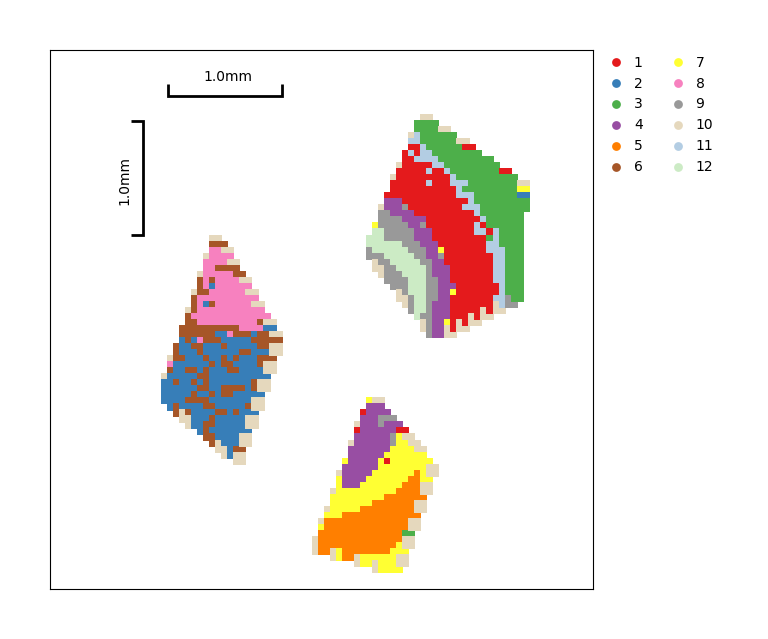

In [11]:
data_high_res.plt.cluster_scatter(res_key='leiden')